In [21]:
import tensorflow as tf
import numpy as np
from skimage.transform import resize as imresize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import cadl
import chars_vaegan

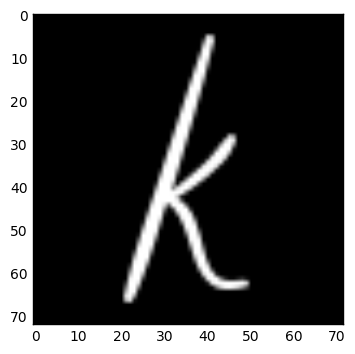

In [23]:
from skimage.data import astronaut

img = imread('/home/vishal/Workspace/nn-ocr/data/en/test/10/1042.png')
imshow(img, cmap='gray')

In [47]:
def preprocess(img):
    img = imresize(img, (100, 100))
    return np.tile(np.expand_dims(img, -1), [1, 1, 3])

def postprocess(recon):
    return np.clip(recon / recon.max(), 0, 1).mean(axis=-1)
    
test_xs = np.array([preprocess(img)])
print(test_xs.shape)

(1, 100, 100, 3)


/home/vishal/anaconda3/envs/ml/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [49]:
tf.reset_default_graph()
with tf.Session().as_default() as sess:
    model = chars_vaegan.load_vaegan("vaegan_model", sess)
    recon, z = sess.run([model['x_tilde'], model['z']], 
                        feed_dict={model['x']: test_xs})

INFO:tensorflow:Restoring parameters from vaegan_model/vaegan-700
VAE model restored.


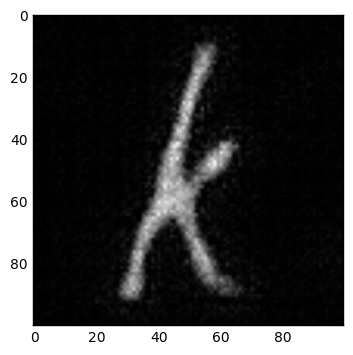

In [50]:
imshow(postprocess(recon[0]), cmap='gray')

In [51]:
z

array([[-0.0278214 , -0.24133763, -0.86060196, -0.48567358, -2.23638058,
         0.10618496, -0.06425047,  0.26429951,  0.35089266, -1.10210121,
         0.88330245, -1.16120958,  0.73266667,  2.44377398,  3.08657336,
         1.5900296 ,  0.99117625, -1.08800817, -0.47580549,  0.41634968,
        -0.27038333,  0.71617448, -2.01284146, -0.94091219, -1.44288635,
         0.84102809, -0.95062947, -1.17551398, -0.23737153,  0.4745304 ,
        -0.33309314,  0.42254502, -2.25184679,  0.78062201, -0.33397466,
         0.8126483 ,  0.24182756,  0.27069762,  1.26437974, -1.63964009,
        -0.34969193,  0.89550507,  1.41954827, -0.9006809 ,  1.35312545,
         0.27714401,  1.02852571,  0.25169683, -1.64585495,  2.14498496,
         0.98661625, -0.08809787,  0.71632397,  1.99129939,  1.53765941,
        -1.4979471 , -0.44530603, -1.45128906, -0.71061951,  0.16714144,
        -1.9821862 ,  1.47707558,  0.28211272,  0.95824921]], dtype=float32)